In [100]:
%run algotithm.ipynb

import matplotlib.pyplot as plt
from datetime import timedelta
import time
import itertools

In [101]:
def test_graph(num_of_nodes,
               edge_existence_prob = 0.3,
               num_iters=30,
               sa_iters=10,
               elitism_size=2,
               mutation_prob=0.1,
               population_size=15,
               tournament_size=3):

    G = nx.erdos_renyi_graph(num_of_nodes, edge_existence_prob)
    while not nx.is_connected(G):
        G = nx.erdos_renyi_graph(num_of_nodes, edge_existence_prob)

    print(f"\n\nTesting a graph of {num_of_nodes} nodes and {len(G.edges)} edges...\n")
    mst=nx.minimum_spanning_tree(G)
    print(sum(1 for node in mst if mst.degree[node] == 1))
    start_time = time.time()
    best_solution = ga(G, num_iters, sa_iters, elitism_size, mutation_prob, population_size, tournament_size)
    end_time = time.time()

    print("Number of leaves:", best_solution.fitness)
    print(f"Execution time: {timedelta(seconds=end_time-start_time)}")
    
    MLST = nx.Graph()
    MLST.add_edges_from(best_solution.edges)
    
    node_colors = []
    for node in MLST.nodes():
        if MLST.degree[node] == 1:
            node_colors.append('red')
        else:
            node_colors.append('blue')
    
    _, axes = plt.subplots(1, 2, figsize=(10, 5))

    nx.draw(G, node_size=10000/num_of_nodes, ax=axes[0])
    axes[0].set_title("Original graph")

    nx.draw(MLST, node_color=node_colors, node_size=10000/num_of_nodes, ax=axes[1])
    axes[1].set_title("Maximum Leaf Spanning Tree")

    plt.tight_layout()
    plt.show()



Testing a graph of 10 nodes and 14 edges...

6
Number of leaves: 7
Execution time: 0:00:00.595596


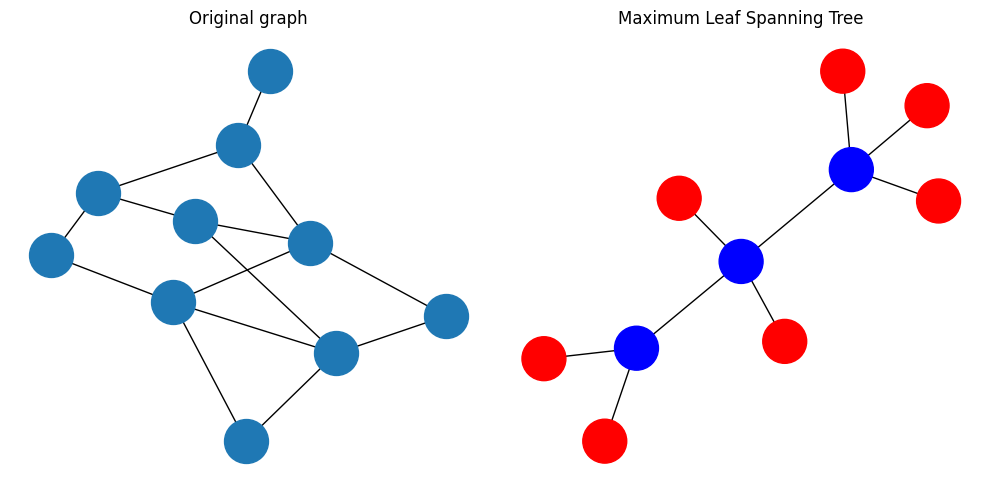

In [103]:
test_graph(num_of_nodes=10,
               edge_existence_prob = 0.3,
               num_iters=10,
               sa_iters=10,
               elitism_size=2,
               mutation_prob=0.1,
               population_size=10,
               tournament_size=10)



Testing a graph of 10 nodes and 13 edges...

5
Number of leaves: 6
Execution time: 0:00:05.714167


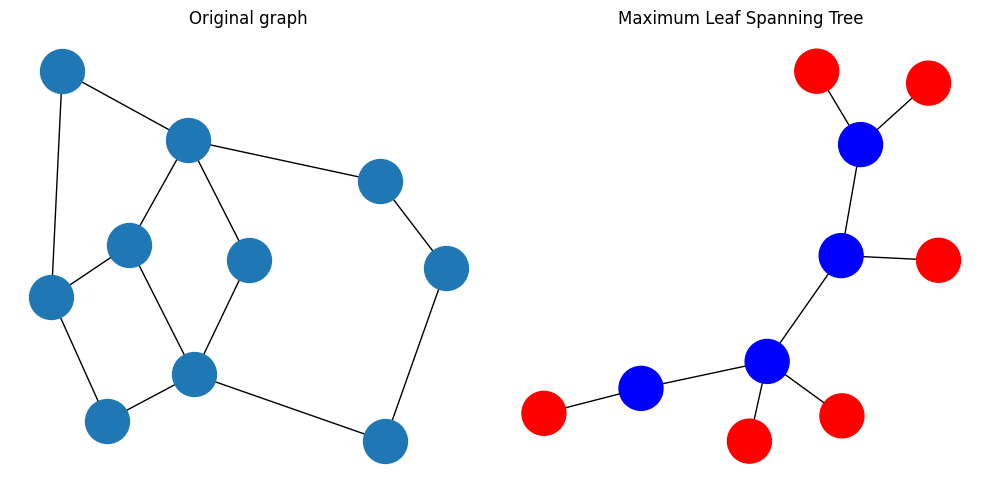

In [104]:
test_graph(num_of_nodes=10,
               edge_existence_prob = 0.2,
               num_iters=10,
               sa_iters=20,
               elitism_size=5,
               mutation_prob=0.2,
               population_size=50,
               tournament_size=10)



Testing a graph of 50 nodes and 875 edges...

46
Number of leaves: 46
Execution time: 0:01:40.189416


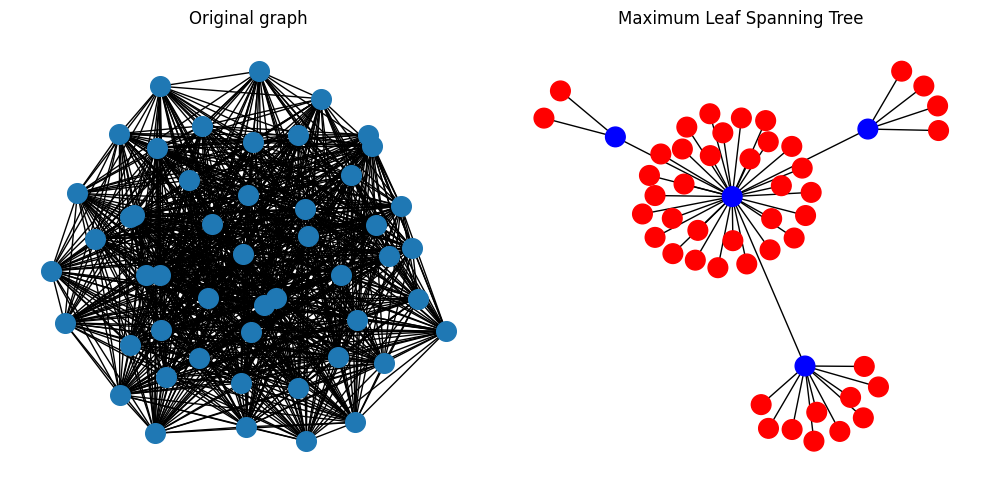

In [106]:
test_graph(num_of_nodes=50,
               edge_existence_prob = 0.7,
               num_iters=50,
               sa_iters=5,
               elitism_size=2,
               mutation_prob=0.2,
               population_size=20,
               tournament_size=10)